# Support Vector Regression

Practice on support vector regression. What is support vector regression? Simply, instead of calculating/looking for a line to predict or separate a set of data, we look for a plane or hyperplane that separates this data. In general, the hyperplane will hug a best fitting line / curve. All data points outside of this hyperplane are called the support vectors, hence the name.

Here's a quick explanation: https://towardsdatascience.com/unlocking-the-true-power-of-support-vector-regression-847fd123a4a0#:~:text=Support%20Vector%20Regression%20is%20a,the%20maximum%20number%20of%20points.

Great videos for Support Vector Machines, SVR's use a similar concept, just for regression:
1. Intuition - https://youtu.be/iEQ0e-WLgkQ
2. SVM Math - https://youtu.be/bM4_AstaBZo
3. SVM Dual - https://youtu.be/6-ntMIaJpm0
4. SVM Kernels - https://youtu.be/OKFMZQyDROI



## Import modules

In [34]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import machine learning libraries
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Salary Position Dataset

### Import dataset & separate X & y

In [42]:
# import dataset
dataset = pd.read_csv('datasets/salary_position.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [43]:
# split dataset into dependent and independent variables
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

# view the shape of the dataset
print(f'Shape of the independent variable: {X.shape}')
print(f'Shape of the dependent variable: {y.shape}')

# view first 5 rows of X and y
print(f'First 5 rows of X: {X[:5]}')
print(f'First 5 rows of y: {y[:5]}')


Shape of the independent variable: (10, 1)
Shape of the dependent variable: (10,)
First 5 rows of X: [[1]
 [2]
 [3]
 [4]
 [5]]
First 5 rows of y: [ 45000  50000  60000  80000 110000]


### Feature Scale the dataset

Since the target values (Salary) is much higher than the feature (Level), it's good to do feature scaling so that the features are not neglected by the model.

In [44]:
# apply feature scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1, 1))

# view first 5 rows of X and y after feature scaling
print(f'X after feature scaling: {X}')
print(f'y after feature scaling: {y}')

X after feature scaling: [[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
y after feature scaling: [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


### Train SVR model

In [45]:
# build SVR model
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X, y)

# predict the result
y_pred = svr_reg.predict(X)

# view the predicted result
print(f'Predicted result: {y_pred}')

# compare the predicted result with the actual result
y_out = np.concatenate((y_pred.reshape(-1, 1), y.reshape(-1, 1)), 1)
print(f'Predicted vs Actual result: {y_out}')

# evaluate the model
print(f'Mean Squared Error: {mean_squared_error(y, y_pred)}')
print(f'R2 Score: {r2_score(y, y_pred)}')



Predicted result: [-0.6197853  -0.62924694 -0.56788994 -0.49732233 -0.44690338 -0.36617206
 -0.14115569  0.28557658  0.78226531  1.08559794]
Predicted vs Actual result: [[-0.6197853  -0.72004253]
 [-0.62924694 -0.70243757]
 [-0.56788994 -0.66722767]
 [-0.49732233 -0.59680786]
 [-0.44690338 -0.49117815]
 [-0.36617206 -0.35033854]
 [-0.14115569 -0.17428902]
 [ 0.28557658  0.17781001]
 [ 0.78226531  0.88200808]
 [ 1.08559794  2.64250325]]
Mean Squared Error: 0.24839989293792014
R2 Score: 0.7516001070620798


c:\Users\IKHSAN-RTX\Envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Reverse feature scaling to give prediction in actual scale

In [46]:
# reverse feature scaling
y_pred_inverse = sc_y.inverse_transform(y_pred.reshape(-1, 1))

# view the predicted result
print(f'Predicted result: {y_pred_inverse}')


Predicted result: [[ 73474.15615697]
 [ 70786.94584626]
 [ 88213.00902103]
 [108254.98574956]
 [122574.52250599]
 [145503.10688572]
 [209410.23132923]
 [330606.89204569]
 [471671.95587315]
 [557821.75899897]]


### Visualize SVR model results

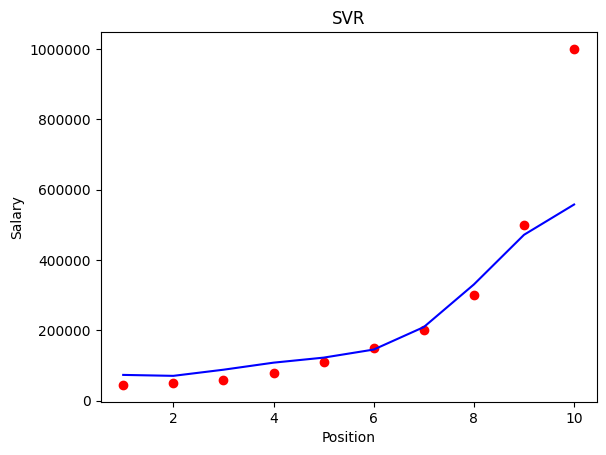

In [49]:
# inverse feature scaling for X and y
X_inverse = sc_X.inverse_transform(X)
y_inverse = sc_y.inverse_transform(y)


# visualize the SVR result
plt.scatter(X_inverse, y_inverse, color='red')
plt.plot(X_inverse, y_pred_inverse, color='blue')
plt.title('SVR')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.ticklabel_format(style='plain')
plt.show()


### Try multiple SVR Models

Kernel: linear
Mean Squared Error: 0.546218664854874
R2 Score: 0.45378133514512575



c:\Users\IKHSAN-RTX\Envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


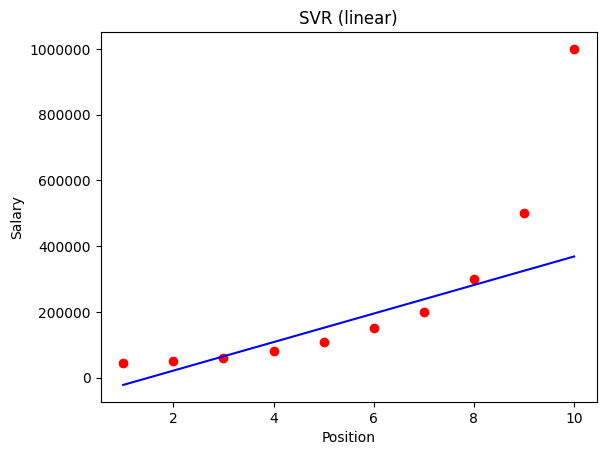

Kernel: poly
Mean Squared Error: 0.35463657178848285
R2 Score: 0.645363428211517



c:\Users\IKHSAN-RTX\Envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


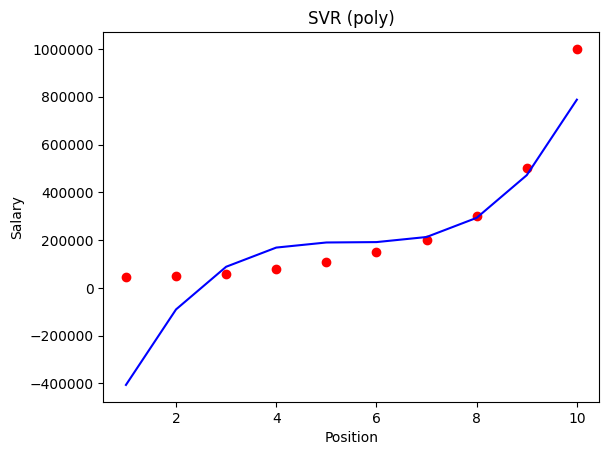

c:\Users\IKHSAN-RTX\Envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Kernel: rbf
Mean Squared Error: 0.24839989293792014
R2 Score: 0.7516001070620798



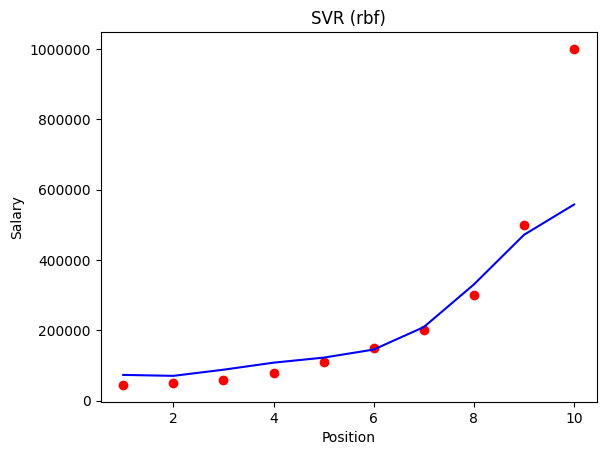

c:\Users\IKHSAN-RTX\Envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Kernel: sigmoid
Mean Squared Error: 1.0101248693947351
R2 Score: -0.010124869394735558



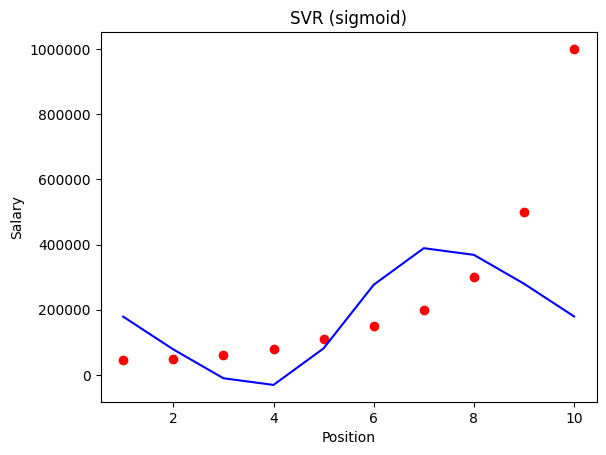

In [51]:
# try multiple SVR models with different kernel
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    svr_reg = SVR(kernel=kernel)
    svr_reg.fit(X, y)
    y_pred = svr_reg.predict(X)
    print(f'Kernel: {kernel}')
    print(f'Mean Squared Error: {mean_squared_error(y, y_pred)}')
    print(f'R2 Score: {r2_score(y, y_pred)}')
    print('')

    y_pred_inverse = sc_y.inverse_transform(y_pred.reshape(-1, 1))

    #visualize the SVR result
    plt.scatter(X_inverse, y_inverse, color='red')
    plt.plot(X_inverse, y_pred_inverse, color='blue')
    plt.title(f'SVR ({kernel})')
    plt.xlabel('Position')
    plt.ylabel('Salary')
    plt.ticklabel_format(style='plain')
    plt.show()
    